In [1]:
import twissed

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const


 twissed (v2.1.1, 2023/01/25)



In [2]:
# Script from Francesco Massimo

lambda0 = 0.8 * twissed.micro

a0 = 1.369
waist0 = 20.9 * twissed.micro
tau_fbpic = 25 * twissed.femto

duration_FWHM = twissed.convert_laser_duration_FWHM(tau_fbpic , convert= "fbpic_to_FWHM")
 
laser = twissed.Laser()

laser.set_laser(
                lambda0,
                a0,
                waist0,
                duration_FWHM,
)

In [3]:
laser.print('a0')
laser.print('n_crit')
laser.print('duration_FWHM')
laser.print('omega0')
laser.print('Efield_laser')

1.369, Maximum laser strength parameter.
1.7419597127682662e+27 [m-3], Laser critical density.
2.9435250562886867e-14 [s], Laser FWHM duration.
2354564459136066.5 [rad/s], Laser angular frequency $2 \pi c / \lambda_0$
4013376368250.118 [V/m], Reference laser electric field $E_{0} = m_{\mathrm{e}} c \omega_0 / e$


In [4]:
nz = 1024 # number of mesh points in the longitudinal direction
nr = 200 # number of mesh points in the radial direction (half plane)
dz = 0.076 * twissed.micro # longitudinal mesh resolution, m
dr = 0.33 * twissed.micro # transverse mesh resolution, m

Lz                  = nz * dz                   # longitudinal size of the simulation window, m
Lr                  = nr * dr                   # transverse size of the simulation window (half plane), m

z_laser_from_right_border = 30.6 * twissed.micro

z_focalisation = Lz - z_laser_from_right_border

plasma_density = 3.3e24  # m-3

laser.set_power(
                z_focalisation,
                z_laser_from_right_border,
                nz,
                nr,
                dz, 
                dr, 
                plasma_density,
)

In [5]:
laser.__dict__

{'a0': 1.369,
 'lambda0': 8e-07,
 'waist0': 2.0899999999999996e-05,
 'duration_FWHM': 2.9435250562886867e-14,
 'omega0': 2354564459136066.5,
 'Efield_laser': 4013376368250.118,
 'n_crit': 1.7419597127682662e+27,
 'z_laser_from_right_border': 3.06e-05,
 'center_laser': 1.575223083163753e-13,
 'z_focalisation': 4.7223999999999994e-05,
 'energy_laser': 0.9534316542615039,
 'power_critical': 8.973731853654705,
 'power_laser': 31.616672991662863,
 'power_ratio_critical': 3.5232469063343403,
 'r_FWHM_intensity': 3.1839195979899496e-05,
 'r_FWHM_field': 4.377889447236181e-05,
 'z_FWHM_field': 8.748543499511237,
 'z_FWHM_intensity': 6.162017595307922,
 'omega_pe': 102482214399365.64}

In [6]:
laser.print('energy_laser')
laser.print('power_critical')
laser.print('power_laser')
laser.print('power_ratio_critical')

0.9534316542615039 [J], Total laser energy produced.
8.973731853654705 [TW], Critical power in the plasma.
31.616672991662863 [TW], Total laser power (through the waist).
3.5232469063343403, Ratio of the laser power over the critical power.


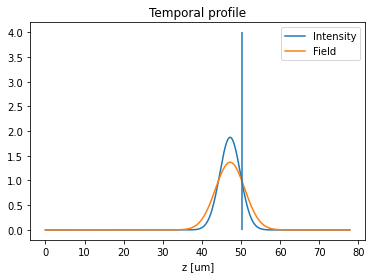

In [7]:

### mesh
# Note that this is the simulation box (moving window)

z_mesh = np.linspace(0,Lz,num=nz)
r_mesh = np.linspace(0,Lr,num=nr)

plt.figure()
plt.title("Temporal profile")

temporal_profile_field     = np.zeros(np.size(z_mesh))
for i in range(0,nz):
	temporal_profile_field[i] = np.abs(laser.FGB(z_mesh[i],0.,z_mesh[i]/const.c))

plt.plot(z_mesh/twissed.micro,(temporal_profile_field)**2,label="Intensity")
plt.plot(z_mesh/twissed.micro,temporal_profile_field,label="Field")
plt.xlabel("z [um]")

plt.vlines(z_mesh[np.argmax(temporal_profile_field**2)]/twissed.micro+laser.z_FWHM_intensity/2,0,4)

plt.legend()



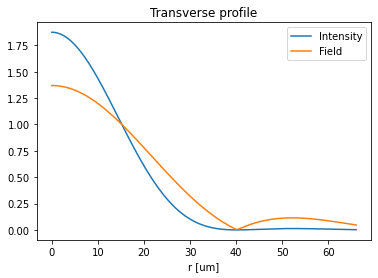

In [8]:
plt.figure()
plt.title("Transverse profile")
plt.plot(r_mesh/twissed.micro,np.abs(laser.FGB(laser.center_laser,r_mesh[:],laser.center_laser))**2,label="Intensity")
plt.plot(r_mesh/twissed.micro,np.abs(laser.FGB(laser.center_laser,r_mesh[:],laser.center_laser)),label="Field")
plt.xlabel("r [um]")
plt.legend()

In [9]:
ne = 2.4e24 # m-3
print('omega_pe = ',twissed.plasma_frequency(ne))

print('omega_0 = ',twissed.omega_laser(lambda0))

omega_pe =  87397126094616.05
omega_0 =  2354564459136066.5


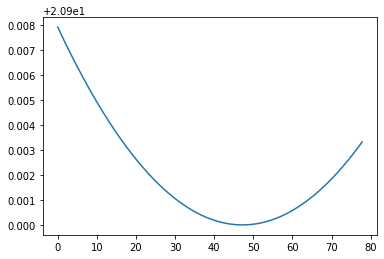

In [10]:
waist = twissed.waist0_theory(z_mesh, laser.waist0, laser.lambda0, zfoc=laser.z_focalisation)

plt.plot(z_mesh/twissed.micro,waist/twissed.micro,label="Waist")